In [1]:
import requests
import re
import nltk
from nltk import word_tokenize
from nltk import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
with open ('Trump/BattleCreekDec19_2019.txt', 'r') as file:
    content = file.read()

In [3]:
content[:1000]

'Thank you. Thank you. Thank you to Vice President Pence. He\'s a good guy. We\'ve done a great job together. And Merry Christmas, Michigan. Thank you, Michigan. What a victory we had in Michigan. What a victory was that. One of the greats. Was that the greatest evening? But I\'m thrilled to be here with thousands of hardworking patriots as we celebrate the miracle of Christmas, the greatness of America and the glory of God. Thank you very much. And did you notice that everybody is saying Merry Christmas again? Did you notice? Saying Merry Christmas. I remember when I first started this beautiful trip, this beautiful journey, I just said to the First Lady, "You are so lucky. I took you on this fantastic journey. It\'s so much fun. They want to impeach you. They want to do worse than that." By the way, by the way, by the way, it doesn\'t really feel like we\'re being impeached. The country is doing better than ever before. We did nothing wrong. We did nothing wrong. And we have tremendo

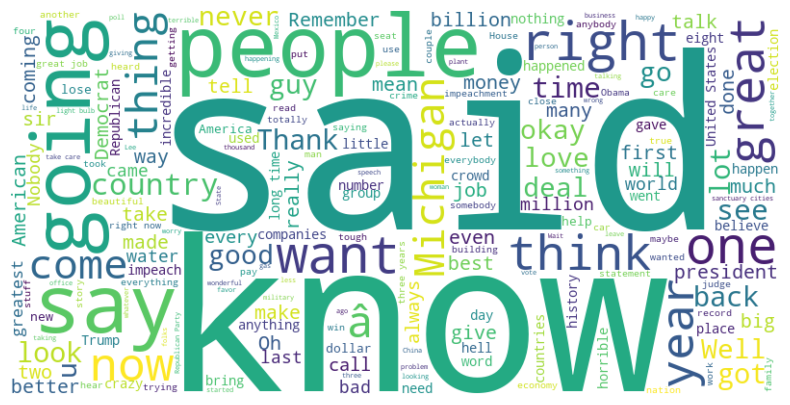

In [4]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
wordcloud.generate(content)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
words = word_tokenize(content)
print(f"The total number of words in the text is {len(words)}")

The total number of words in the text is 22677


In [7]:
fdist = FreqDist(words)

fdist.most_common(10)

[('.', 1588),
 (',', 1505),
 ('the', 644),
 ('I', 603),
 ('to', 425),
 ('you', 392),
 ("'s", 362),
 ('a', 353),
 ('it', 338),
 ('and', 331)]

In [8]:
words_no_punc = []

for word in words:
    if word.isalpha():
        words_no_punc.append(word.lower())
        
print(f"The total number of words without punctualtion is {len(words_no_punc)}")

The total number of words without punctualtion is 17560


In [9]:
fdist = FreqDist(words_no_punc)
fdist.most_common(10)

[('the', 701),
 ('i', 603),
 ('you', 534),
 ('and', 497),
 ('they', 438),
 ('to', 427),
 ('it', 424),
 ('we', 379),
 ('a', 362),
 ('that', 337)]

In [10]:
nltk.download("stopwords")
from nltk.corpus import stopwords

stopwords_list = stopwords.words("english")
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
clean_words = []

for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)
        
print(f"The total number of words without punctuation and stopwords is {len(clean_words)}")

The total number of words without punctuation and stopwords is 7841


In [12]:
fdist = FreqDist(clean_words)
fdist.most_common(10)

[('said', 142),
 ('know', 137),
 ('people', 111),
 ('going', 97),
 ('right', 93),
 ('say', 92),
 ('great', 77),
 ('want', 74),
 ('like', 73),
 ('one', 68)]

In [13]:
stopwords_list.extend(["said", "one", "like", "come", "would", "could", "us", "go", "see", "still"])

clean_words1 = []

for word in words_no_punc:
    if word not in stopwords_list:
        clean_words1.append(word)

In [14]:
fdist = FreqDist(clean_words1)
fdist.most_common(10)

[('know', 137),
 ('people', 111),
 ('going', 97),
 ('right', 93),
 ('say', 92),
 ('great', 77),
 ('want', 74),
 ('think', 62),
 ('years', 60),
 ('get', 59)]

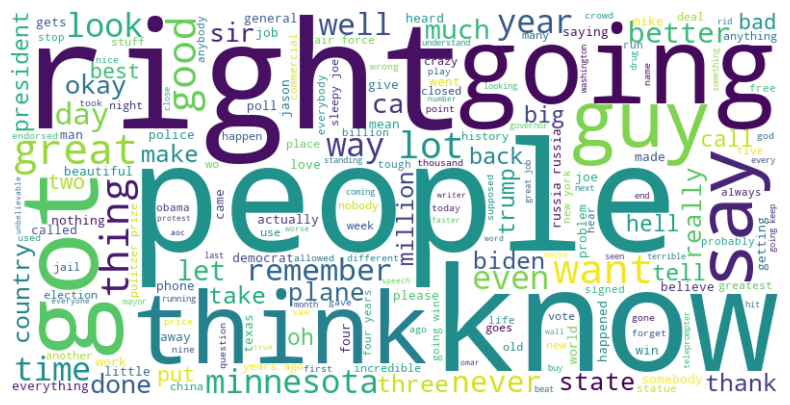

In [37]:
clean_words_string = " ".join(clean_words1)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
wordcloud.generate(clean_words_string)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
analyzer = SentimentIntensityAnalyzer()

In [20]:
sentiment_df = pd.DataFrame(columns=["Speech", "Compound Score"])

In [21]:
sentiment_scores = analyzer.polarity_scores(clean_words_string)
compound_score = sentiment_scores['compound']
sentiment_df = sentiment_df.append({"Speech": "BattleCreekDec19_2019", "Compound Score": compound_score}, ignore_index=True)
    
sentiment_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_3596\1852567009.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df = sentiment_df.append({"Speech": "BattleCreekDec19_2019", "Compound Score": compound_score}, ignore_index=True)


,Speech,Compound Score
0,BattleCreekDec19_2019,1.0


In [22]:
with open ('Trump/BemidjiSep18_2020.txt', 'r') as file:
    content1 = file.read()

In [23]:
content1[:1000]

"There's a lot of people. That's great. Thank you very much. Thank you very much. That's a big group of people. This is on fast notice, too. Thank you. But I'm thrilled to be here with the beautiful, great, hardworking people of this incredible state. You're really hardworking American patriots. That's what you are, and a lot of people haven't been treated right until I came along. We've done a lot of work and a lot of good work, and you had your best year ever last year. The state had the best year you've ever had. 46 days from now, we're going to win Minnesota, and we're going to win four more years in the White House. One of the most vital issues in this election is the subject of refugees. You know it. You know it perhaps better than almost anybody. Lots of luck. You're having a good time with the refugees. That's good. We want to have Omar. He said Omar. That's a beauty. How the hell did she win the election? How did she win? It's unbelievable. Every family in Minnesota needs to k

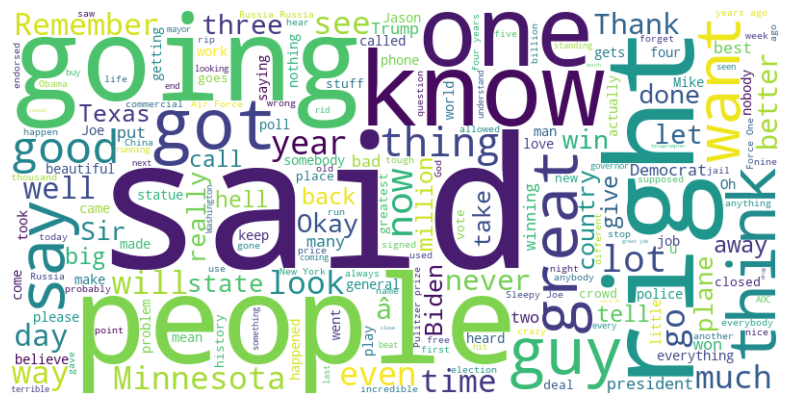

In [24]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
wordcloud.generate(content1)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
words1 = word_tokenize(content1)
print(f"The total number of words in the text is {len(words1)}")

The total number of words in the text is 21462


In [26]:
fdist1 = FreqDist(words1)

fdist1.most_common(10)

[('.', 1782),
 (',', 1145),
 ('I', 579),
 ('the', 558),
 ('a', 420),
 ('to', 401),
 ("'s", 385),
 ('it', 345),
 ('you', 309),
 ('and', 294)]

In [27]:
words_no_punc1 = []

for word in words1:
    if word.isalpha():
        words_no_punc1.append(word.lower())
        
print(f"The total number of words without punctualtion is {len(words_no_punc1)}")

The total number of words without punctualtion is 16684


In [29]:
fdist1 = FreqDist(words_no_punc1)
fdist1.most_common(10)

[('the', 612),
 ('i', 579),
 ('and', 489),
 ('it', 446),
 ('you', 432),
 ('a', 430),
 ('to', 402),
 ('they', 378),
 ('that', 335),
 ('we', 291)]

In [30]:
clean_words1 = []

for word in words_no_punc1:
    if word not in stopwords_list:
        clean_words1.append(word)
        
print(f"The total number of words without punctuation and stopwords is {len(clean_words1)}")

The total number of words without punctuation and stopwords is 6952


In [31]:
fdist1 = FreqDist(clean_words)
fdist1.most_common(10)

[('said', 142),
 ('know', 137),
 ('people', 111),
 ('going', 97),
 ('right', 93),
 ('say', 92),
 ('great', 77),
 ('want', 74),
 ('like', 73),
 ('one', 68)]

In [32]:
stopwords_list.extend(["said", "one", "like", "come", "would", "could", "us", "go", "see", "still"])

clean_words2 = []

for word in words_no_punc1:
    if word not in stopwords_list:
        clean_words2.append(word)

In [33]:
fdist1 = FreqDist(clean_words2)
fdist1.most_common(10)

[('people', 102),
 ('right', 100),
 ('going', 100),
 ('know', 96),
 ('got', 81),
 ('great', 71),
 ('think', 70),
 ('get', 67),
 ('want', 59),
 ('good', 58)]

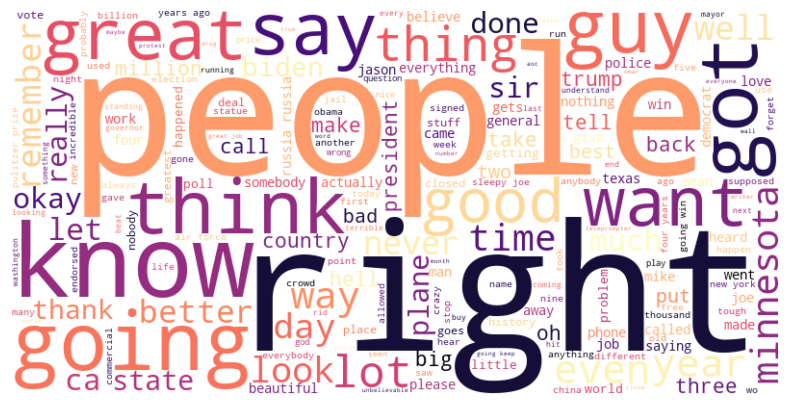

In [34]:
clean_words_string1 = " ".join(clean_words2)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma')
wordcloud.generate(clean_words_string1)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
sentiment_df1 = pd.DataFrame(columns=["Speech", "Compound Score"])

In [36]:
sentiment_scores = analyzer.polarity_scores(clean_words_string1)
compound_score = sentiment_scores['compound']
sentiment_df1 = sentiment_df1.append({"Speech": "BattleCreekDec19_2019", "Compound Score": compound_score}, ignore_index=True)
    
sentiment_df1

C:\Users\Admin\AppData\Local\Temp\ipykernel_3596\307823095.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df1 = sentiment_df1.append({"Speech": "BattleCreekDec19_2019", "Compound Score": compound_score}, ignore_index=True)


,Speech,Compound Score
0,BattleCreekDec19_2019,1.0
